In [2]:
import sys, os, re; sys.path = (["../src/", "../"] if re.match(r'^(\w\:\\)|(/)', os.getcwd()) else [])+ sys.path 

%load_ext autoreload
%autoreload 2
from qubx.utils import ohlc_plot, set_mpl_theme
from qubx.data.readers import DataReader, DataProcessor, OhlcvPandasDataProcessor, OhlcvDataProcessor, QuestDBConnector
set_mpl_theme('dark')

In [3]:
db0 = QuestDBConnector('user=admin password=quest host=localhost port=8812', OhlcvDataProcessor())
db1 = QuestDBConnector('user=admin password=quest host=localhost port=8812', OhlcvPandasDataProcessor())

2024-05-07 16:11:05.109 [ ℹ️ ] Connecting to QuestDB ...
2024-05-07 16:11:07.167 [ ℹ️ ] Connecting to QuestDB ...


In [4]:
%%time
h0 = db0.read("BINANCEF.ETHUSDT", '5m', '2023-01-01')

CPU times: total: 406 ms
Wall time: 1.94 s


In [ ]:
h0

In [5]:
%%time
h1 = db1.read("BINANCEF.ETHUSDT", '5m', '2023-01-01')

CPU times: total: 62.5 ms
Wall time: 1.21 s


In [6]:
all(h0.pd()[['open', 'high', 'low', 'close']] == h1[['open', 'high', 'low', 'close']])

True

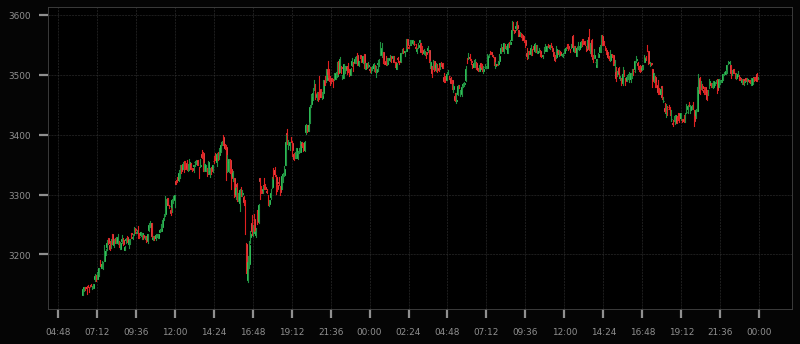

In [7]:
bbs = h1.iloc[-500:]
ax = ohlc_plot(bbs)